# Treatment figure with SAMHSA 2022 data

Kendra Wyant

In [ ]:
#| message: false

library(tidyverse)

theme_set(theme_classic())

devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true")

path_data <- ("R:/studydata/other/samhsa")

load(here::here(path_data, "NSDUH_2022.Rdata"))

Recode levels based on codebook

In [ ]:
#| message: false

d <- NSDUH_2022 |> 
  mutate(subid = QUESTID2,
         race = if_else(NEWRACE2 == 1, "Non-Hispanic White", "Other"),
         sex = if_else(irsex == 1, "man", "woman"),
         age = case_when(AGE3 == 1 ~ "12-13",
                         AGE3 == 2 ~ "14-15", 
                         AGE3 == 3 ~ "16-17",
                         AGE3 == 4 ~ "18-20",
                         AGE3 == 5 ~ "21-23",
                         AGE3 == 6 ~ "24-25",
                         AGE3 == 7 ~ "26-29",
                         AGE3 == 8 ~ "30-34",
                         AGE3 == 9 ~ "35-49",
                         AGE3 == 10 ~ "50-64",
                         AGE3 == 11 ~ "65+"),
         income = factor(IRPINC3, 
                         levels = 1:7, 
                         labels = c("< 10,000", "10,000 - 19,999", "20,000 - 29,999",
                                    "30,000 - 39,999", "40,000 - 49,999", "50,000 - 74,999",
                                    "75,000+") ),
         poverty = factor(POVERTY3, levels = 1:3, 
                          labels = c("poverty", "up to 2x federal poverty threshold",
                                     "more than 2x federal poverty threshold")),
         employment = factor(WRKSTATWK2,
                             levels = 1:9,
                             labels = c("full-time", "part-time", "student",
                                        "volunteer or has job but did not work in past week",
                                        "unemployed/looking for work", "disabled",
                                        "keeping house full-time", "retired",
                                        "not working for other reason")),
         marital = factor(irmarit, 
                          levels = 1:4,
                          labels = c("married", "widowed", "divorced or separated",
                                     "never been married")),
         education = factor(IREDUHIGHST2,
                            levels = 1:11,
                            labels = c("fifth grade or less",
                                       "sixth grade",
                                       "seventh grade",
                                       "eighth grade",
                                       "ninth grade",
                                       "tenth grade",
                                       "eleventh or twelfth grade (no diploma)",
                                       "high school diploma/GED",
                                       "some college",
                                       "Associate's degree",
                                       "college graduate or higher")),
         aud_past_year = if_else(IRPYUD5ALC == 1, "yes", "no"),
         aud_sev_past_year = factor(IRPYSEV5ALC, 
                                    levels = c(1,2,3,9),
                                    labels = c("mild", "moderate", "severe", "none")),
         aud_tx_clinician_past_year = if_else(irsutinhosp == 1 | irsutinrhab == 1 |
                                               irsutinrsmh == 1 | irsutinopl == 1 | irsutoutrhab == 1 |
                                                irsutoutmhcr == 1 | irsutoutthrp == 1 | irsutoutdoc == 1 |
                                                irsutouthosp == 1 | irsutoutschl == 1 | irsutoutopl == 1 |
                                                irsutrxalc == 1 | irsutphvid == 1 | irsutdetox == 1,
                                    "yes", "no"),
         aud_tx_clinician_carceral_past_year = if_else(irsutinhosp == 1 | irsutinrhab == 1 |
                                               irsutinrsmh == 1 | irsutinopl == 1 | irsutoutrhab == 1 |
                                                irsutoutmhcr == 1 | irsutoutthrp == 1 | irsutoutdoc == 1 |
                                                irsutouthosp == 1 | irsutoutschl == 1 | irsutoutopl == 1 |
                                                irsutrxalc == 1 | irsutphvid == 1 | irsutdetox == 1 |
                                               sutrtalcpy == 1 | sutrtdralpy == 1,
                                    "yes", "no"),
         aud_tx_any_past_year = if_else(irsutinhosp == 1 | irsutinrhab == 1 | irsutinrsmh == 1 | 
                                          irsutinopl == 1 | irsutoutrhab == 1 | irsutoutmhcr == 1 |
                                          irsutoutthrp == 1 | irsutoutdoc == 1 | irsutouthosp == 1 |
                                          irsutoutschl == 1 | irsutoutopl == 1 | irsutrxalc == 1 |
                                          irsutphvid == 1 | irsutdetox == 1  | irsutpeerspc == 1 |
                                          irsutsuppgrp == 1,
                                    "yes", "no"))

## AUD prevalence

11% of individuals in data set met criteria for AUD

In [ ]:
janitor::tabyl(d$aud_past_year)

 d$aud_past_year     n   percent
              no 52725 0.8926002
             yes  6344 0.1073998

Filter down to those who met criteria for AUD

In [ ]:
d <- d |> 
  filter(aud_past_year == "yes")

## Obtained AUD tx (age 12+)

### Clinican delivered

Defined as treatment for alcohol or alcohol and drugs combined in the
following settings:  
- outpatient - inpatient - professional tx over phone or through video -
medication tx - detox

In [ ]:
janitor::tabyl(d$aud_tx_clinician_past_year)

 d$aud_tx_clinician_past_year    n   percent
                           no 5520 0.8701135
                          yes  824 0.1298865

### Clinician delivered (including carceral settings)

Note: can’t be entirely sure about the precision of this distinction

In [ ]:
janitor::tabyl(d$aud_tx_clinician_carceral_past_year)

 d$aud_tx_clinician_carceral_past_year    n   percent
                                    no 5518 0.8697982
                                   yes  826 0.1302018

### Any treatment

Includes the addition of support groups and peer support specialist or
recovery coaches

In [ ]:
janitor::tabyl(d$aud_tx_any_past_year)

 d$aud_tx_any_past_year    n   percent
                     no 5425 0.8551387
                    yes  919 0.1448613

## Obtained AUD tx (age 18+)

### Clinican delivered

In [ ]:
d |> 
  filter(!age %in% c("12-13", "14-15", "16-17")) |>
  janitor::tabyl(aud_tx_clinician_past_year)

 aud_tx_clinician_past_year    n  percent
                         no 5211 0.875504
                        yes  741 0.124496

### Clinician delivered (including carceral settings)

In [ ]:
d |> 
  filter(!age %in% c("12-13", "14-15", "16-17")) |>
  janitor::tabyl(aud_tx_clinician_carceral_past_year)

 aud_tx_clinician_carceral_past_year    n  percent
                                  no 5209 0.875168
                                 yes  743 0.124832

### Any treatment

Includes the addition of support groups and peer support specialist or
recovery coaches

In [ ]:
d |> 
  filter(!age %in% c("12-13", "14-15", "16-17")) |>
  janitor::tabyl(aud_tx_any_past_year)

 aud_tx_any_past_year    n  percent
                   no 5119 0.860047
                  yes  833 0.139953

## Figure Using clinican care for US adults

**Note: SAMHSA data for 2023 suggest this number lowers from 12% to less
than 10%, but data is not available to download yet.**

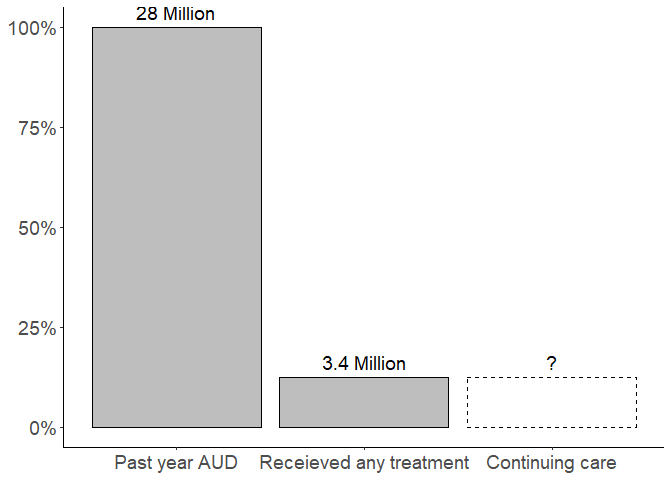

In [ ]:
#| label: samhsa
#| out-align: right

tx_summary <- d |> 
  filter(!age %in% c("12-13", "14-15", "16-17")) |> 
  mutate(`Past year AUD` = "yes") |> 
  rename(`Receieved any treatment` = aud_tx_clinician_past_year) |>
  pivot_longer(cols = c(`Past year AUD`, `Receieved any treatment`)) |> 
  mutate(name = factor(name),
         value = if_else(value == "yes", 1, 0)) |> 
  group_by(name) |> 
  summarize(value = sum(value), 
            proportion = value/nrow(subset(d, !age %in% c("12-13", "14-15", "16-17"))), 
            .groups = "drop") |> 
  mutate(label = c("28 Million", "3.4 Million"))

unknown <- tibble(name = "Continuing care", 
                   value = pull(subset(tx_summary, name == "Receieved any treatment"), value),
                   proportion = pull(subset(tx_summary, name == "Receieved any treatment"), proportion),
            label = "?")

tx_summary |>
  ggplot(aes(x = name, y = proportion)) +
  geom_bar(stat = "identity", 
           fill = "grey",
           color = "black",
           linewidth = .7) +
  geom_bar(data = unknown,
           aes(x = name, y = proportion), 
           fill = "white", color = "black", 
           stat = "identity", 
           linetype = "dashed",
           linewidth = .7) +
  geom_text(aes(label = label), 
            vjust = -0.5,               
            color = "black",
            size = 5) +
  geom_text(data = unknown,
            aes(label = label), 
            vjust = -0.5,               
            color = "black",
            size = 5) +
  labs(x = NULL,
       y = NULL) +
  scale_y_continuous(limits = c(0, 1), labels = scales::percent_format()) +
  theme(axis.text = element_text(size = 14),        
        axis.title = element_text(size = 16),       
        axis.line = element_line(linewidth = .7))  